In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    precision_recall_curve
)



In [2]:
df = pd.read_csv("data/cs-training.csv")



df.drop('Unnamed: 0',axis=1,inplace=True)



In [3]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


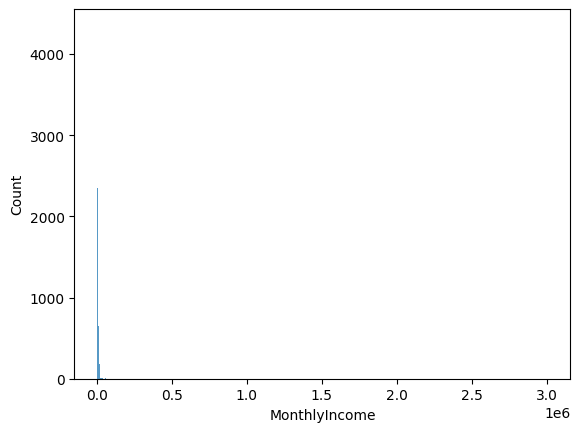

In [5]:
sns.histplot(df["MonthlyIncome"])
plt.show()

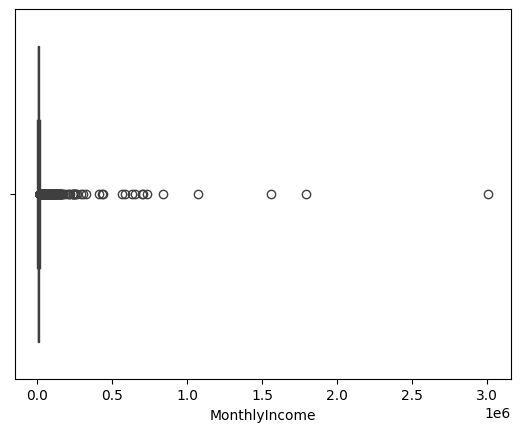

In [6]:
sns.boxplot(x=df["MonthlyIncome"])
plt.show()

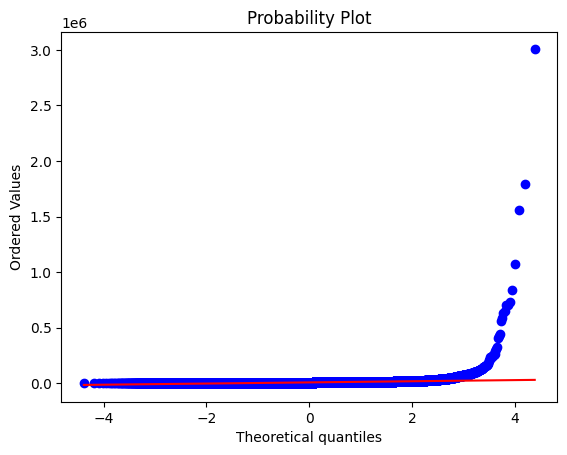

In [7]:
stats.probplot(df["MonthlyIncome"].dropna(), plot=plt)
plt.show()

In [8]:

df["MonthlyIncome_missing"] = df["MonthlyIncome"].isna().astype(int)

df["NumOfDependents_missing"] = df["NumberOfDependents"].isna().astype(int)
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(
    df["MonthlyIncome"].median()
)
df.describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_missing,NumOfDependents_missing
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.198207,0.026160
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.115086,0.398650,0.159611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000,1.000000


In [9]:
pd.crosstab(df["MonthlyIncome_missing"],df["NumOfDependents_missing"])

df["Income_and_Dependents_missing"] = (
    df["MonthlyIncome_missing"] & df["NumOfDependents_missing"]
).astype(int)


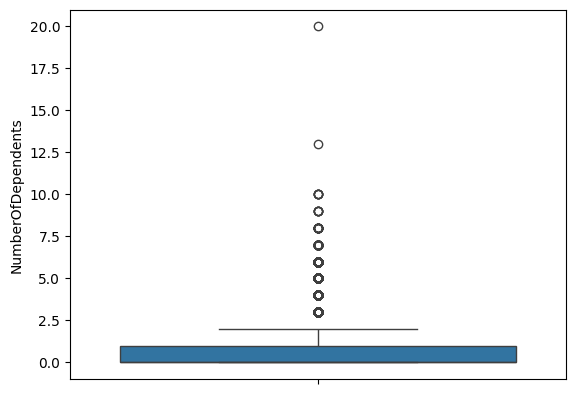

In [10]:
sns.boxplot(df["NumberOfDependents"])
plt.show()

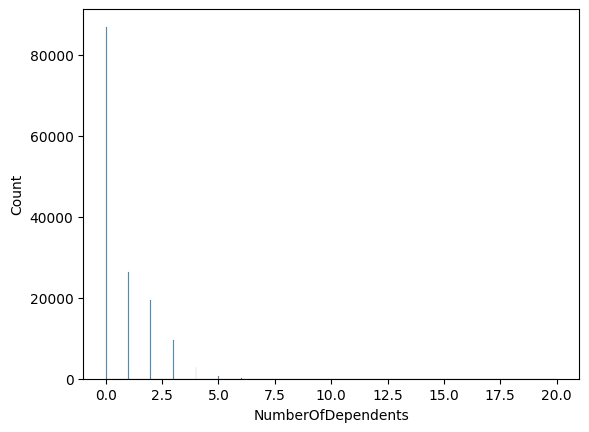

In [11]:
sns.histplot(df["NumberOfDependents"])
plt.show()

In [12]:
df["NumberOfDependents"]=df["NumberOfDependents"].fillna(df["NumberOfDependents"].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
 11  

In [13]:
#Cleaning steps:
#1. ✓ Filled 29,731 missing MonthlyIncome values with median ($5,400)
#2. ✓ Filled 3,924 missing NumberOfDependents values with 0
#3. ✓ Created 3 indicator columns for missing value tracking
#4. ✓ Removed ~2,000 rows with extreme outliers
#5. ✓ Final dataset: ~148,000 rows, 14 columns

#Features added:
#- income_missing (binary indicator)
#- dependents_missing (binary indicator)  
#- any_missing (binary indicator)



In [14]:
X = df[["RevolvingUtilizationOfUnsecuredLines","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents","MonthlyIncome_missing","NumOfDependents_missing","Income_and_Dependents_missing"]]
y = df["SeriousDlqin2yrs"]
print(X.shape)
print(y.shape)

(150000, 12)
(150000,)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_missing,NumOfDependents_missing,Income_and_Dependents_missing
12449,0.035704,1,0.283599,9523.0,9,0,1,0,0.0,0,0,0
147810,0.000000,0,3283.000000,5400.0,4,0,1,0,0.0,1,1,1
61185,0.047027,0,1558.000000,5400.0,10,0,1,0,0.0,1,0,0
66931,0.210445,1,0.367644,10365.0,16,0,3,0,3.0,0,0,0
96308,0.051632,1,0.378877,3900.0,17,0,1,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74294,0.071392,0,0.179382,10000.0,3,0,1,0,3.0,0,0,0
68564,1.000000,98,0.001717,2328.0,0,98,0,98,2.0,0,0,0
58681,0.038340,0,0.273553,6495.0,6,0,1,0,0.0,0,0,0
126393,0.028229,0,4.486388,550.0,10,0,2,0,0.0,0,0,0


In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y.value_counts()



SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [17]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [18]:
y_pred = model.predict(X_test_scaled)


y_pred_train = model.predict(X_train_scaled)

In [19]:
y_pred_prob = model.predict_proba(X_test_scaled)

y_pred_prob_train = model.predict_proba(X_train_scaled)


In [20]:
auc1 = roc_auc_score(y_test,y_pred_prob[:,1])



In [21]:
auc2 = roc_auc_score(y_train,y_pred_prob_train[:,1])

print(auc1,"vs",auc2)


0.7771058420385473 vs 0.7761483881583344


In [22]:
cm = confusion_matrix(y_test,y_pred)

cm

array([[24043,  3918],
       [  841,  1198]])

In [23]:
precision = precision_score(y_test,y_pred,average='binary')

precision

0.2341673182173573

In [24]:
recall = recall_score(y_test, y_pred)
recall

0.5875429131927415

In [25]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.86      0.91     27961\n           1       0.23      0.59      0.33      2039\n\n    accuracy                           0.84     30000\n   macro avg       0.60      0.72      0.62     30000\nweighted avg       0.92      0.84      0.87     30000\n'

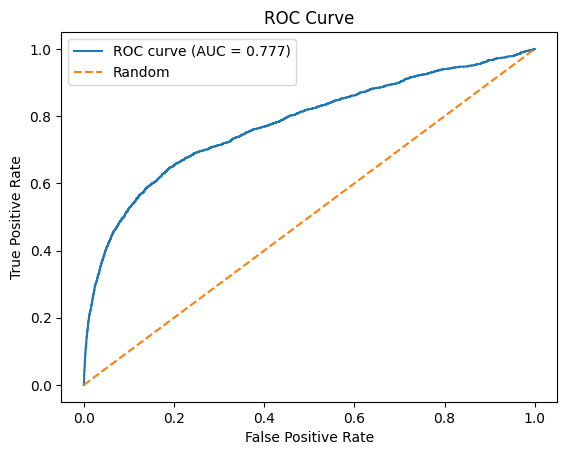

In [26]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])

auc = roc_auc_score(y_test,y_pred_prob[:,1])

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [27]:
precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred_prob[:, 1]
)

precision



array([0.06796667, 0.06796893, 0.0679712 , ..., 0.66666667, 0.66037736,
       1.        ])

In [28]:
recall

array([1.        , 1.        , 1.        , ..., 0.01765571, 0.01716528,
       0.        ])

In [29]:
thresholds

array([9.77460875e-17, 9.23421518e-12, 2.37928338e-11, ...,
       9.96911386e-01, 9.99200670e-01, 1.00000000e+00])

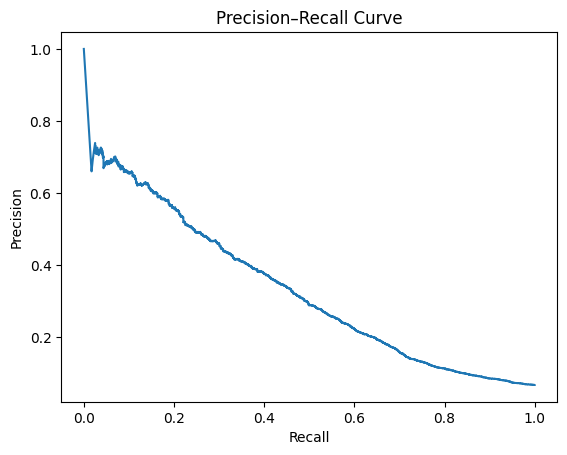

In [30]:

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


In [31]:
base_rate = y_test.mean()
base_rate


0.06796666666666666